### Clustering and PCA assignment

## Note: Do install the necessary libraries for ipywidgets

#### 1. Import libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
# read the dataset
cndf = pd.read_csv("Country-data.csv")

cndf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# basics of the df
cndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# 2. Check missing data

In [5]:
# missing values
round(100*(cndf.isnull().sum())/len(cndf), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
cndf.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# 3. Outlier Check

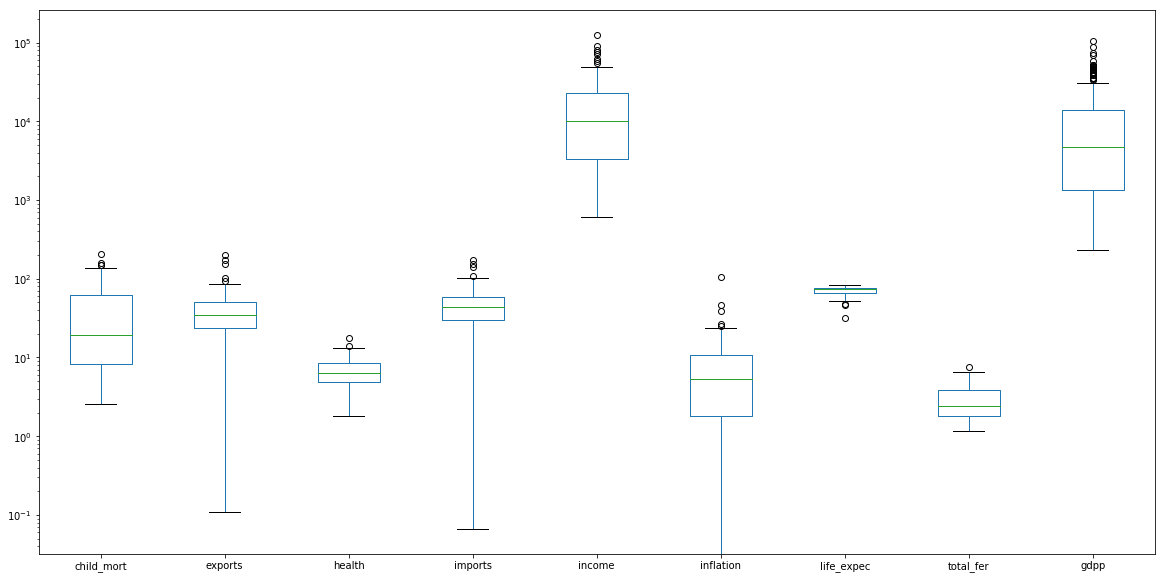

In [7]:
# 1. checking the outliers
cndf.plot(kind="box", figsize=[20,10],logy=True)

In [8]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
cndf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [9]:
#checking the values of outliers of each column of data

In [10]:
print("Checking outliers at 25%,50%,75%,90%,95% and 99%:-","\n")
for i in cndf.iloc[:,1:].columns:
    print(i, cndf.iloc[:,1:].quantile([.25,.5,.75,.90,.95,.98,.99])[i].values)

Checking outliers at 25%,50%,75%,90%,95% and 99%:- 

child_mort [  8.25  19.3   62.1  100.22 116.   145.16 153.4 ]
exports [ 23.8    35.     51.35   70.8    80.57  100.056 160.48 ]
health [ 4.92   6.32   8.6   10.94  11.57  11.9   13.474]
imports [ 30.2   43.3   58.75  75.42  81.14 105.76 146.08]
income [ 3355.  9960. 22800. 41220. 48290. 74208. 84374.]
inflation [ 1.81   5.39  10.75  16.64  20.87  25.988 41.478]
life_expec [65.3  73.1  76.8  80.4  81.4  82.   82.37]
total_fer [1.795  2.41   3.88   5.322  5.861  6.4504 6.5636]
gdpp [ 1330.  4660. 14050. 41840. 48610. 66364. 79088.]


In [11]:
@interact
def outliers(col=cndf.iloc[:,1:].columns):
    print("The Countries in the 90th percentile of ",col,":","\n",cndf[cndf[col]>=cndf[col].quantile(.90)],"\n")

interactive(children=(Dropdown(description='col', options=('child_mort', 'exports', 'health', 'imports', 'inco…

In [12]:
cndf.shape

(167, 10)

### Rescaling the data

In [13]:
# 2. rescaling
country_df = cndf.iloc[:,1:]

# instantiate
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df)
country_df_scaled.shape

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(167, 9)

In [14]:
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [15]:
cndfscaled=pd.concat([cndf["country"],country_df_scaled.round(2)],axis=1)

In [16]:
print("Checking outliers at 25%,50%,75%,90%,95% and 99%:-","\n")
for i in cndfscaled.iloc[:,1:].columns:
    print(i, (cndfscaled.iloc[:,1:].quantile([.25,.5,.75,.90,.95,.98,.99])[i].values))

Checking outliers at 25%,50%,75%,90%,95% and 99%:- 

child_mort [-0.75   -0.47    0.595   1.542   1.93    2.6572  2.865 ]
exports [-0.63   -0.22    0.375   1.088   1.445   2.1544  4.3654]
health [-0.695  -0.18    0.65    1.506   1.738   1.86    2.4294]
imports [-0.69   -0.15    0.495   1.182   1.417   2.4372  4.11  ]
income [-0.72   -0.37    0.295   1.254   1.623   2.9688  3.4972]
inflation [-0.565  -0.23    0.285   0.844   1.24    1.7288  3.1976]
life_expec [-0.59    0.29    0.7     1.11    1.22    1.29    1.3304]
total_fer [-0.765  -0.36    0.62    1.568   1.934   2.3192  2.3968]
gdpp [-0.64   -0.45    0.06    1.58    1.954   2.9224  3.6182]


In [17]:
@interact
def outliers(col=cndfscaled.iloc[:,1:].columns):
    print("The Countries in the 90th percentile of ",col,":","\n",cndfscaled[cndfscaled[col]>=cndfscaled[col].quantile(.90)],"\n")

interactive(children=(Dropdown(description='col', options=('child_mort', 'exports', 'health', 'imports', 'inco…

# 4. Modelling

## Finding the Optimal Number of Clusters

### SSD

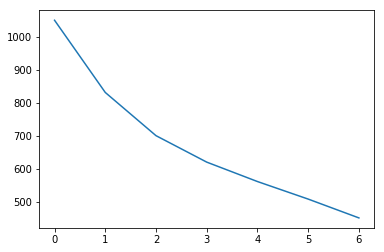

In [18]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [19]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels,random_state=100)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.28735668921406704
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29595170577528157
For n_clusters=5, the silhouette score is 0.30088229124112015
For n_clusters=6, the silhouette score is 0.22355189579545645
For n_clusters=7, the silhouette score is 0.225456151494487
For n_clusters=8, the silhouette score is 0.24114748813999998


In [20]:
# final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=50,random_state=100)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [21]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 4, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

## Hierarchical Clustering

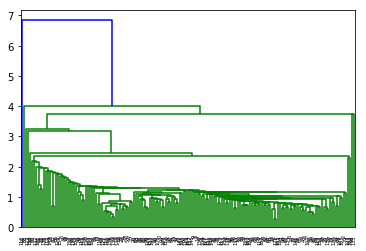

In [22]:
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

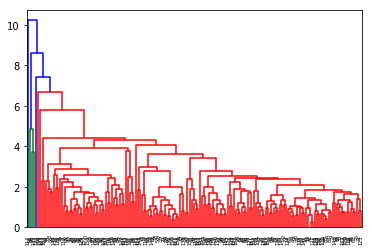

In [23]:
# average linkage
mergings = linkage(country_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

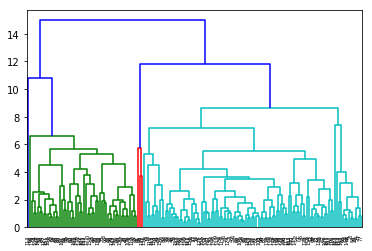

In [24]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [25]:

# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels


array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0])

In [26]:
# assign cluster labels
cndf['cluster_labels'] = cluster_labels
cndf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [27]:
# assign cluster labels
cndf['cluster_id'] = kmeans.labels_
cndf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2


In [28]:
vars=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [29]:
@interact
def boxplots(x="cluster_id", y=vars):
    return sns.boxplot(x=x, y=y, data=cndf)

interactive(children=(Text(value='cluster_id', description='x'), Dropdown(description='y', options=('child_mor…

In [30]:

@interact
def boxplots(x="cluster_labels", y=vars):
    return sns.boxplot(x=x, y=y, data=cndf)

interactive(children=(Text(value='cluster_labels', description='x'), Dropdown(description='y', options=('child…

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
country_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [33]:
#First convert the numpy array that you have to a dataframe
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = country_df.columns

In [34]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_df_scaled)

0.856762658990398

In [35]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [36]:

country_df_scaled.shape

(167, 9)

In [37]:
# PCA fit
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(country_df_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [38]:
# PCA transform
pca_df = pca.transform(country_df_scaled)
pca_df.shape

(167, 9)

In [39]:
# Store the PCs and their coefficients with the original variables
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[4], 'Feature':vars})
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,-0.168970,child_mort
1,0.283897,0.613163,0.144761,0.057616,exports
2,0.150838,-0.243087,-0.596632,0.518000,health
3,0.161482,0.671821,-0.299927,0.255376,imports
4,0.398441,0.022536,0.301548,-0.247150,income
5,-0.193173,-0.008404,0.642520,0.714869,inflation
6,0.425839,-0.222707,0.113919,0.108220,life_expec
7,-0.403729,0.155233,0.019549,-0.135262,total_fer
8,0.392645,-0.046022,0.122977,-0.180167,gdpp


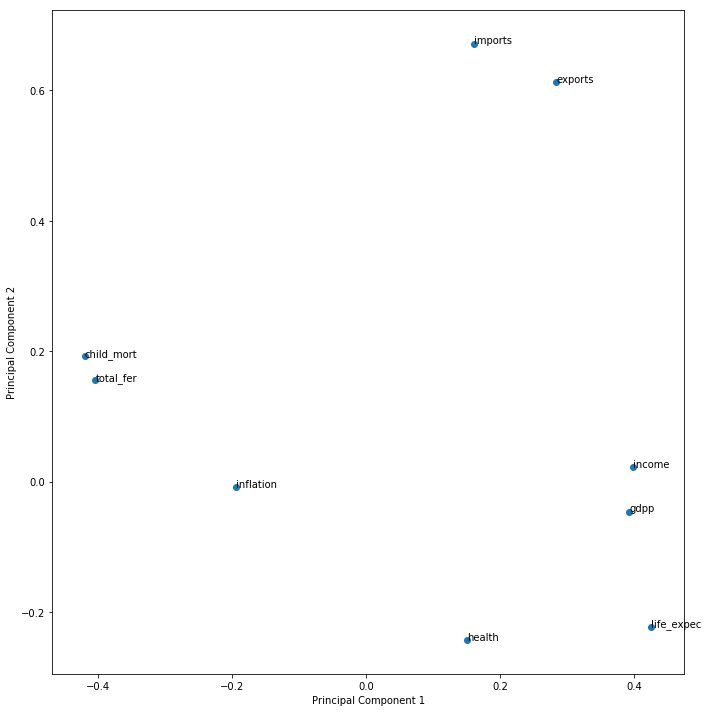

In [40]:
# plot the original variables along the PCs 
# this gives a sense of what the PCs 'might mean intuitively'
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

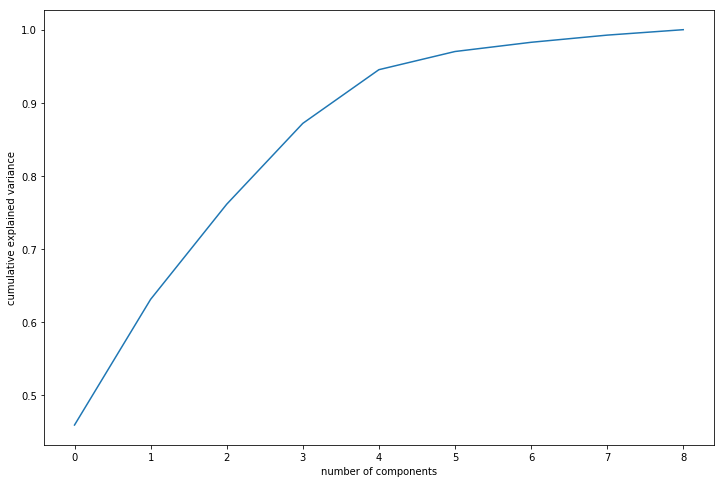

In [41]:
# the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [42]:
# PCA with 4 components
pca = PCA(n_components=4, svd_solver='randomized', random_state=42)
pca_df = pca.fit_transform(country_df_scaled)
pca_df.shape

(167, 4)

In [43]:
pca_df = pd.DataFrame(pca_df)
pca_df['country'] = cndf['country']
pca_df.columns = ['PC1', 'PC2',"PC3","PC4",'country']
pca_df.head()

,PC1,PC2,PC3,PC4,country
0,-2.913025,0.095621,-0.718118,1.005255,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,Algeria
3,-2.932423,1.695555,1.525044,0.839625,Angola
4,1.033576,0.136659,-0.225721,-0.847063,Antigua and Barbuda


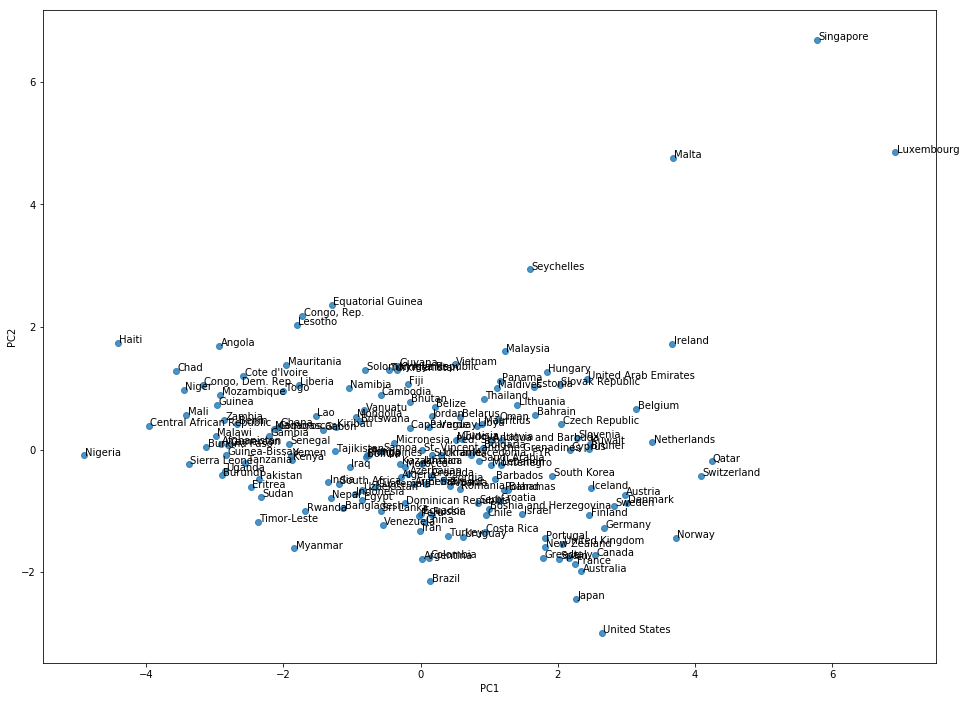

In [44]:
plt.figure(figsize=(16, 12))
sns.regplot(x='PC1', y='PC2', data=pca_df, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pca_df.PC1, pca_df.PC2, pca_df.country, plt.gca()) 

In [45]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

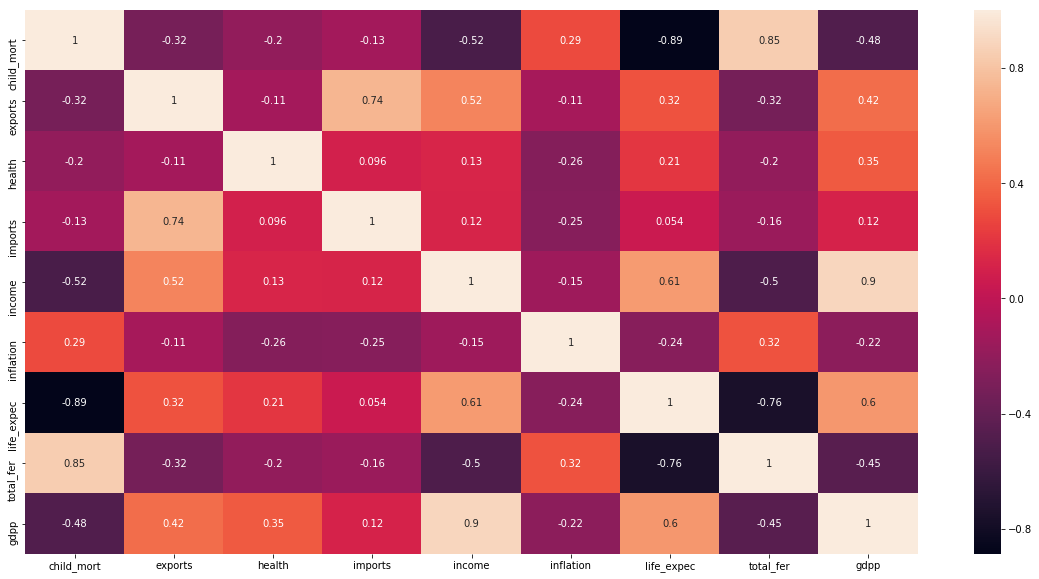

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(country_df.corr(),annot = True)

#### -total fertility and child mortality are high positive correlated 
#### -life expectancy and child mortality are as evident negatively correlated
#### -life exp and total fert are also neg correlated
#### -income and gdpp have high positive correlation

### life, gdpp,inflation,health can be seen as the major factors rest others are correlation of these


In [47]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df.iloc[:,:-1].transpose())

In [48]:
corrmat

array([[ 1.00000000e+00, -1.43706750e-16,  7.41098833e-17,
        -2.14002806e-16],
       [-1.43706750e-16,  1.00000000e+00,  1.88760238e-16,
         1.05862762e-16],
       [ 7.41098833e-17,  1.88760238e-16,  1.00000000e+00,
         1.09194554e-16],
       [-2.14002806e-16,  1.05862762e-16,  1.09194554e-16,
         1.00000000e+00]])

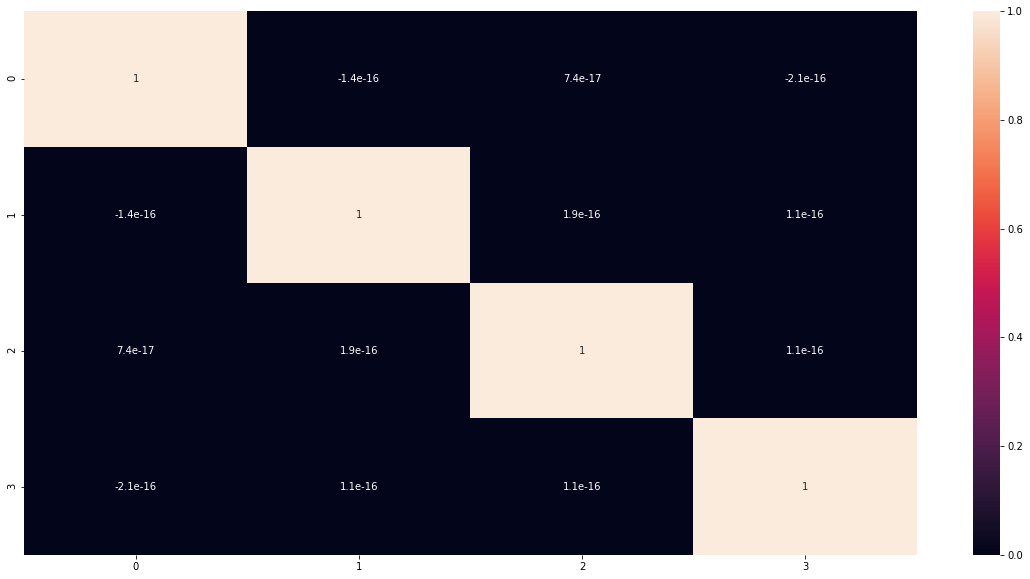

In [49]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [50]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 1.8876023780722771e-16 , min corr:  -2.1400280604294126e-16


##### The correlations of PCs are negligible values close to 0

In [51]:
pca_df_clusterlabels=pd.concat([pca_df,cndf["cluster_labels"]],axis=1)

In [52]:
pca_df_clusterlabels.groupby("cluster_labels").count()

,PC1,PC2,PC3,PC4,country
cluster_labels,,,,,
0,54,54,54,54,54
1,95,95,95,95,95
2,14,14,14,14,14
3,3,3,3,3,3
4,1,1,1,1,1


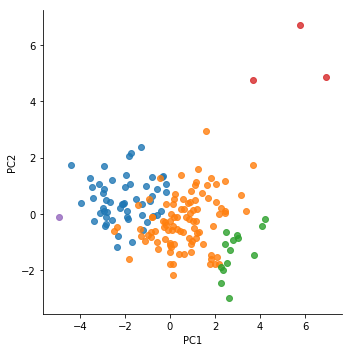

In [53]:
sns.lmplot( x='PC1', y="PC2", data=pca_df_clusterlabels, fit_reg=False, hue='cluster_labels', legend=False)

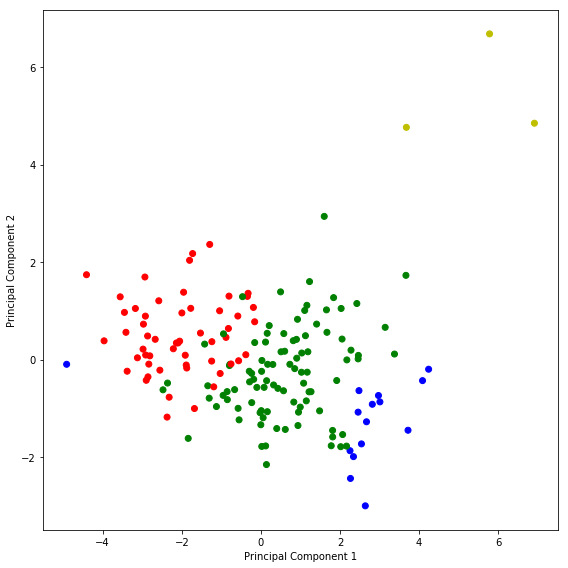

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df_clusterlabels.iloc[:,0], pca_df_clusterlabels.iloc[:,1],c=pca_df_clusterlabels["cluster_labels"].map({0:'r',1:"g",2:'b',3:"y",4:"b"}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

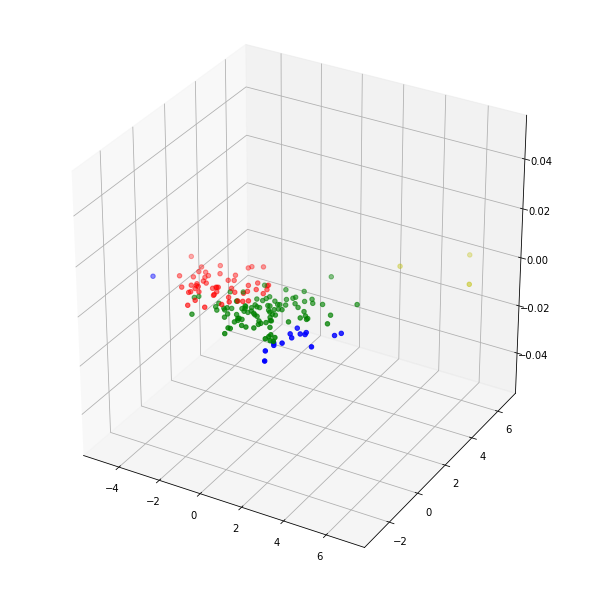

In [55]:
%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(pca_df_clusterlabels.iloc[:,0], pca_df_clusterlabels.iloc[:,1],c=pca_df_clusterlabels["cluster_labels"].map({0:'r',1:"g",2:'b',3:"y",4:"b"}))


In [56]:
# for comparing the clusters formed by kmeans , we use cluster_id to plot the scatter of countries
pca_clusterid=pd.concat([pca_df_clusterlabels,cndf["cluster_id"]],axis=1)

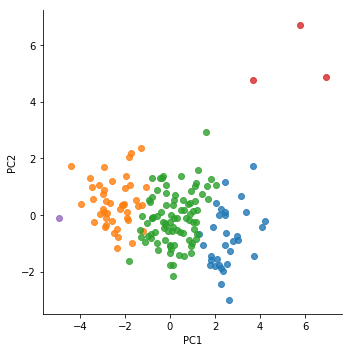

In [57]:
sns.lmplot( x='PC1', y="PC2", data=pca_clusterid, fit_reg=False, hue='cluster_id', legend=False)

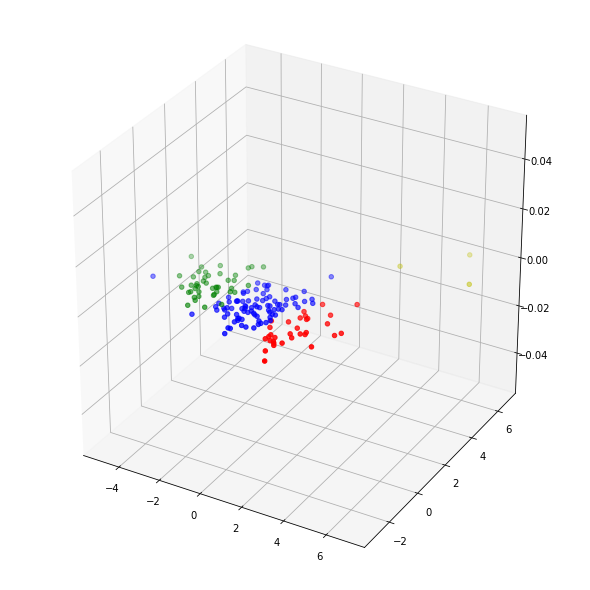

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(pca_clusterid.iloc[:,0], pca_clusterid.iloc[:,1],c=pca_clusterid["cluster_id"].map({0:'r',1:"g",2:'b',3:"y",4:"b"}))


#### comparing both the plots we see that the clusters formed by kmeans are less appropriate than the hierarchical clustering

In [59]:
pca_df_clusterlabels.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'country', 'cluster_labels'], dtype='object')

In [60]:
pc=['PC1', 'PC2', 'PC3', 'PC4']

In [61]:
@interact
def boxplots(y=pc):
    return sns.boxplot(x="cluster_labels", y=y, data=pca_df_clusterlabels)

interactive(children=(Dropdown(description='y', options=('PC1', 'PC2', 'PC3', 'PC4'), value='PC1'), Output()),…

In [62]:
var=["gdpp","income","child_mort"]

In [63]:
@interact
def boxplots(y=var):
    return sns.boxplot(x="cluster_labels", y=y, data=cndf)

interactive(children=(Dropdown(description='y', options=('gdpp', 'income', 'child_mort'), value='gdpp'), Outpu…

In [64]:
cndf.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels',
       'cluster_id'],
      dtype='object')

In [65]:
othervars=['exports', 'health', 'imports','inflation', 'life_expec', 'total_fer']

In [66]:
@interact
def boxplots(y=othervars):
    return sns.boxplot(x="cluster_labels", y=y, data=cndf)

interactive(children=(Dropdown(description='y', options=('exports', 'health', 'imports', 'inflation', 'life_ex…

In [67]:
@interact
def scplot(x=vars,y=vars):
    return sns.lmplot( x=x, y=y, data=cndf, fit_reg=False, hue='cluster_labels', legend=False)

interactive(children=(Dropdown(description='x', options=('child_mort', 'exports', 'health', 'imports', 'income…

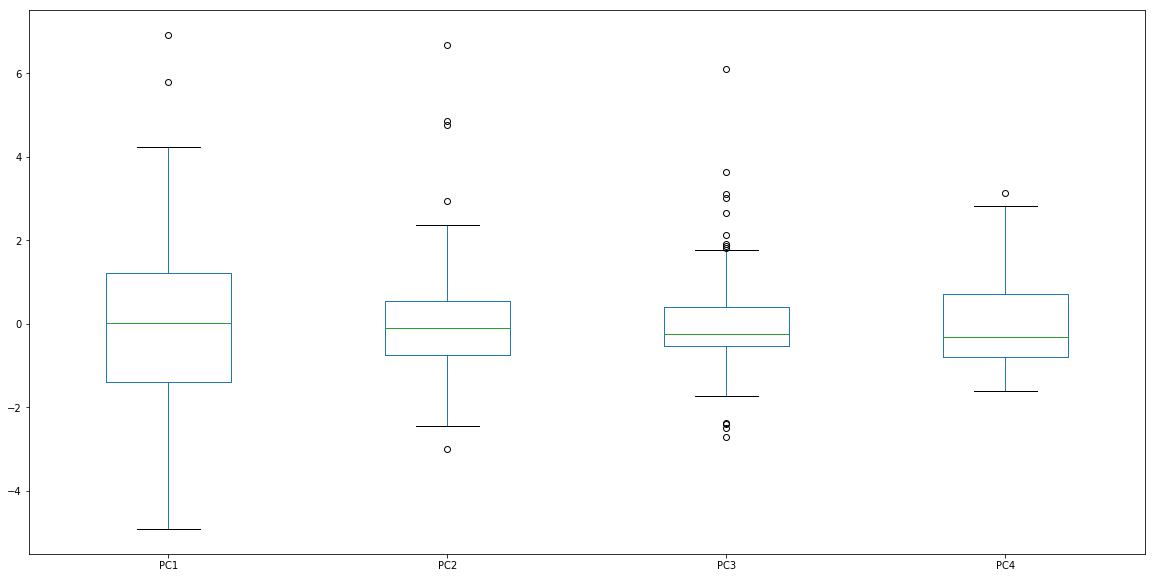

In [68]:
# 1. checking the outliers
pca_df.plot(kind="box", figsize=[20,10])

In [69]:
print("Checking outliers at 25%,50%,75%,90%,95% and 99%:-","\n")
for i in pca_df.iloc[:,:-1].columns:
    print(i, pca_df.iloc[:,:-1].quantile([.25,.5,.75,.90,.95,.98,.99])[i].values)

Checking outliers at 25%,50%,75%,90%,95% and 99%:- 

PC1 [-1.38227017  0.02240726  1.22432798  2.46231513  3.10379772  3.97099245
  4.76626353]
PC2 [-0.75204799 -0.09449868  0.55347469  1.29022624  1.71931174  2.75498424
  4.79416765]
PC3 [-0.52187757 -0.24560589  0.40254513  1.2833073   1.81377702  2.90221723
  3.28580858]
PC4 [-0.78378475 -0.31185654  0.71072534  1.21704604  1.79168139  2.52771883
  2.78568092]


In [70]:
@interact
def outliers(col=pca_df.iloc[:,:-1].columns):
    print("The Countries in the 90th percentile of ",col,":","\n",pca_df[pca_df[col]>=pca_df[col].quantile(.90)],"\n")

interactive(children=(Dropdown(description='col', options=('PC1', 'PC2', 'PC3', 'PC4'), value='PC1'), Output()…

In [71]:
vars

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [72]:
pcdf=pca_df.iloc[:,:-1]
pcdf.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [73]:
pcdf.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


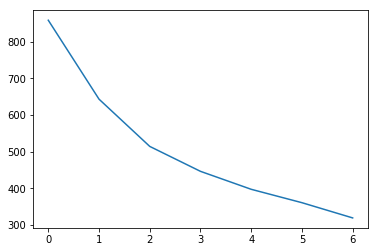

In [74]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(pcdf)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [75]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(pcdf)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pcdf, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.3223238938928094
For n_clusters=3, the silhouette score is 0.334085952458005
For n_clusters=4, the silhouette score is 0.3549131449906334
For n_clusters=5, the silhouette score is 0.28511618045640774
For n_clusters=6, the silhouette score is 0.29196363193952557
For n_clusters=7, the silhouette score is 0.26089927794838774
For n_clusters=8, the silhouette score is 0.28503511729338826


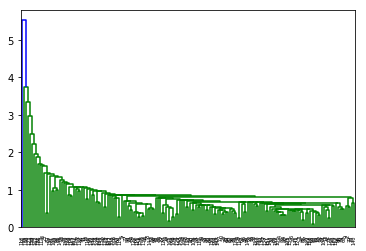

In [76]:
# single linkage
mergings = linkage(pcdf, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

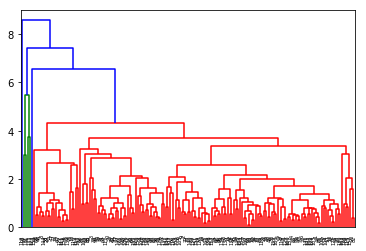

In [77]:
# average linkage
mergings = linkage(pcdf, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

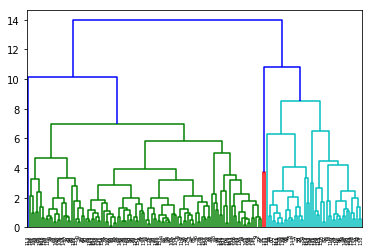

In [78]:
# complete linkage
mergings = linkage(pcdf, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [79]:
# 4 clusters
cluster_labels4pcdf = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels4pcdf

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 4, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0])

In [80]:
# assign cluster labels
pcdf['cluster_labels'] = cluster_labels4pcdf
pcdf.head()

,PC1,PC2,PC3,PC4,cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,0
2,-0.285225,-0.455174,1.221505,-0.868115,0
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,0


In [81]:
# final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=50,random_state=100)
kmeans.fit(pcdf.iloc[:,:-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [82]:
# assign the label
pcdf['cluster_id'] = kmeans.labels_

In [83]:
kmeans.labels_

array([0, 4, 2, 0, 4, 2, 2, 1, 1, 2, 4, 4, 2, 4, 4, 1, 4, 0, 4, 2, 4, 0,
       2, 1, 4, 0, 0, 4, 0, 1, 4, 0, 0, 2, 2, 2, 0, 0, 0, 4, 0, 4, 1, 4,
       1, 2, 2, 2, 4, 0, 0, 4, 4, 1, 1, 2, 0, 4, 1, 0, 1, 4, 2, 0, 0, 4,
       0, 4, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 4, 2, 0, 0, 1, 4, 0, 4, 4, 0,
       0, 2, 4, 3, 4, 0, 0, 4, 4, 0, 3, 0, 4, 4, 4, 2, 4, 4, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 4, 4, 2, 2, 4, 1, 1, 4, 2, 0, 4, 2, 0, 4, 4,
       0, 3, 4, 1, 4, 0, 4, 1, 2, 4, 0, 4, 1, 1, 2, 0, 4, 0, 0, 4, 4, 2,
       4, 0, 4, 1, 1, 1, 2, 2, 4, 2, 4, 0, 0])

In [84]:
pcdf["country"]=cndf["country"]
pcdf.head()

,PC1,PC2,PC3,PC4,cluster_labels,cluster_id,country
0,-2.913025,0.095621,-0.718118,1.005255,0,0,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0,4,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0,2,Algeria
3,-2.932423,1.695555,1.525044,0.839625,0,0,Angola
4,1.033576,0.136659,-0.225721,-0.847063,0,4,Antigua and Barbuda


In [85]:
pcdf.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'cluster_labels', 'cluster_id', 'country'], dtype='object')

In [86]:
pcdf.iloc[:,:-3].columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [87]:
hopkins(pcdf.iloc[:,:-3])

0.7697907436728363

In [88]:
pcdf.groupby("cluster_labels").count()

,PC1,PC2,PC3,PC4,cluster_id,country
cluster_labels,,,,,,
0,116,116,116,116,116,116
1,22,22,22,22,22,22
2,26,26,26,26,26,26
3,2,2,2,2,2,2
4,1,1,1,1,1,1


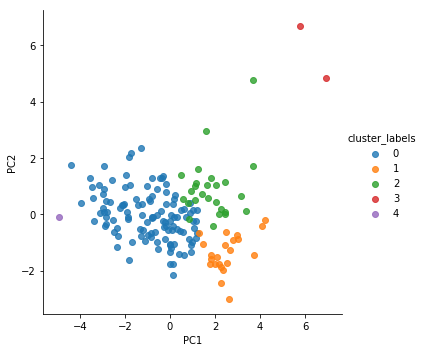

In [89]:
sns.lmplot( x='PC1', y="PC2", data=pcdf, fit_reg=False, hue='cluster_labels', legend=True)

In [90]:
pcdf.groupby("cluster_id")[["country","cluster_id"]].count()

,country,cluster_id
cluster_id,,
0,45,45
1,29,29
2,36,36
3,3,3
4,54,54


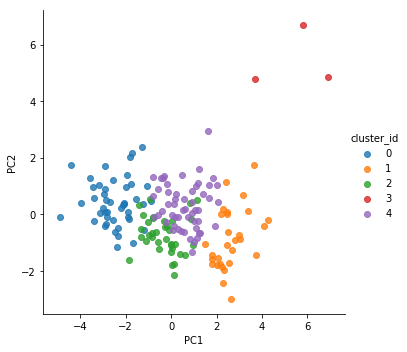

In [91]:
sns.lmplot( x='PC1', y="PC2", data=pcdf, fit_reg=False, hue='cluster_id', legend=True)

In [92]:
counpcadf=pd.concat([country_df,pcdf.iloc[:,4:]],axis=1)

In [93]:
counpcadf.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster_labels', 'cluster_id',
       'country'],
      dtype='object')

In [94]:
segmentdf=pd.concat([counpcadf.iloc[:,-3:],country_df_scaled],axis=1)
segmentdf.sort_values(ascending=True,by="cluster_labels").head()

,cluster_labels,cluster_id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
109,0,2,Nepal,0.217119,-1.153648,-0.571711,-0.434611,-0.788475,0.694389,-0.254406,-0.223920,-0.677045
108,0,0,Namibia,0.440955,0.244825,-0.013032,0.572142,-0.451851,-0.400591,-1.348410,0.432010,-0.425428
107,0,2,Myanmar,0.649869,-1.500192,-1.769403,-1.939940,-0.698465,-0.070389,-0.423582,-0.356431,-0.655375
106,0,0,Mozambique,1.560136,-0.351593,-0.586317,-0.028596,-0.844249,-0.013458,-1.810825,1.730618,-0.686513


In [95]:
@interact
def boxplots(y=vars):
    return sns.boxplot(x="cluster_labels", y=y, data=segmentdf)

interactive(children=(Dropdown(description='y', options=('child_mort', 'exports', 'health', 'imports', 'income…

In [96]:
@interact
def scplot(x=vars,y=vars):
    return sns.lmplot( x=x, y=y, data=segmentdf, fit_reg=False, hue="cluster_labels", legend=True)

interactive(children=(Dropdown(description='x', options=('child_mort', 'exports', 'health', 'imports', 'income…

In [97]:
@interact
def segdf(cluster_label=[0,1,2,3,4]):
    print(segmentdf[segmentdf["cluster_labels"]==cluster_label].country.values)

interactive(children=(Dropdown(description='cluster_label', options=(0, 1, 2, 3, 4), value=0), Output()), _dom…

In [98]:
@interact
def countryplot(Country=segmentdf["country"]):
    return print("Cluster_label - ",segmentdf[segmentdf["country"]==Country]["cluster_labels"].values), segmentdf.iloc[:,3:][segmentdf["country"]==Country].plot(kind="bar", legend="best", figsize=[7,5])

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

In [99]:
@interact
def scplot(x=vars,y=vars):
    return sns.lmplot( x=x, y=y, data=segmentdf, fit_reg=False, hue="cluster_id", legend=True)

interactive(children=(Dropdown(description='x', options=('child_mort', 'exports', 'health', 'imports', 'income…

In [100]:

@interact
def segiddf(id=[0,1,2,3,4]):
    print(segmentdf[segmentdf["cluster_id"]==id].country)


interactive(children=(Dropdown(description='id', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_classes=('…

In [101]:
pc=['PC1', 'PC2', 'PC3', 'PC4']
@interact
def boxplots(y=pc):
    return sns.boxplot(x="cluster_labels", y=y, data=pcdf)

interactive(children=(Dropdown(description='y', options=('PC1', 'PC2', 'PC3', 'PC4'), value='PC1'), Output()),…

In [102]:
@interact
def boxplots(y=vars):
    return sns.boxplot(x="cluster_id", y=y, data=segmentdf)

interactive(children=(Dropdown(description='y', options=('child_mort', 'exports', 'health', 'imports', 'income…

#### for "child_mort","inflation","total_fer" we need to check the values which are on the higher quantile side . i.e. those countries which have higher values of these socio economic variables compared to other countries will be considered for funding

In [103]:
@interact
def outliers(col=["child_mort","inflation","total_fer"],j=[.75,.90,.95,.98,.99]):
    print("The Countries in the 90th percentile of ",col,":","\n",counpcadf[counpcadf[col]>=counpcadf[col].quantile(j)]["country"].values,"\n")

interactive(children=(Dropdown(description='col', options=('child_mort', 'inflation', 'total_fer'), value='chi…

#### for "exports","imports","health","life_expec","gdpp","income" we need to check the values which are on the lower side . i.e. those countries which have low values of these socio economic variables will be considered for funding

@interact
def outliers(col=["exports","imports","health","life_expec","gdpp","income"],j=[.10,.20,.25,.30,.35]):
    print("The Countries which have low ",col,"are :","\n",segmentdf[segmentdf[col]<=segmentdf[col].quantile(j)]["country"].values,"\n")

In [104]:
could_be_funded=segmentdf[segmentdf["cluster_labels"]==0]

In [105]:
# PCA fit
pcanew = PCA(svd_solver='randomized', n_components=5,random_state=100)
pcanew.fit(could_be_funded.iloc[:,3:])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [106]:
# PCA transform
pcanewdf = pcanew.transform(could_be_funded.iloc[:,3:])
pcanewdf.shape

(116, 5)

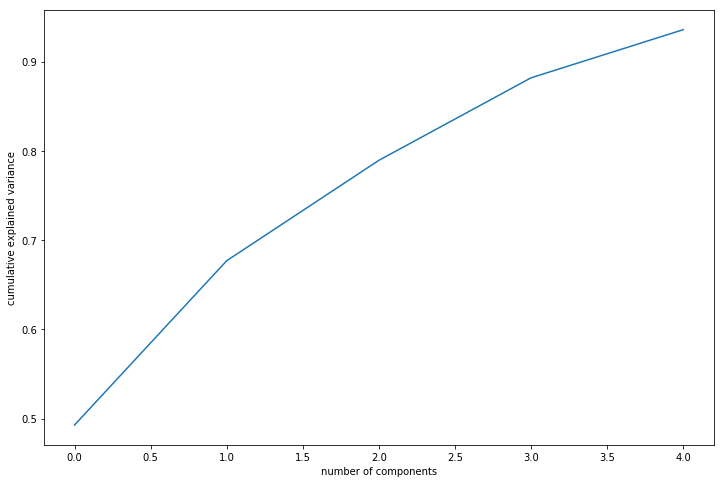

In [107]:
# the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pcanew.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [108]:
pcanewdf = pd.DataFrame(pcanewdf)
pcanewdf['country'] = could_be_funded['country']
pcanewdf.columns = ['PC1', 'PC2',"PC3","PC4","PC5",'country']
pcanewdf.head()


,PC1,PC2,PC3,PC4,PC5,country
0,2.256149,0.410906,0.649392,-0.155021,-0.288021,Afghanistan
1,-1.751952,0.215152,-0.043210,-0.340374,0.000366,Albania
2,-1.076075,-1.262610,-0.011043,0.414749,-0.306683,Algeria
3,2.560542,-1.376789,-0.938256,1.245702,-0.378179,Angola
4,-1.846265,0.382520,-0.754116,-0.129794,-0.340009,Antigua and Barbuda


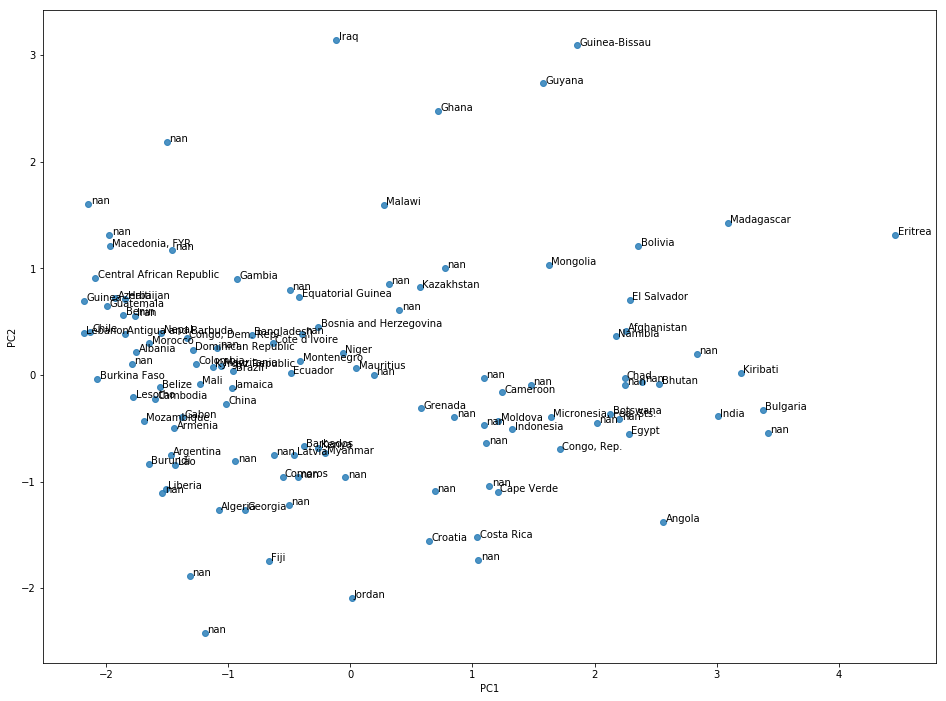

In [109]:
plt.figure(figsize=(16, 12))
sns.regplot(x='PC1', y='PC2', data=pcanewdf, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pcanewdf.PC1, pcanewdf.PC2, pcanewdf.country, plt.gca()) 

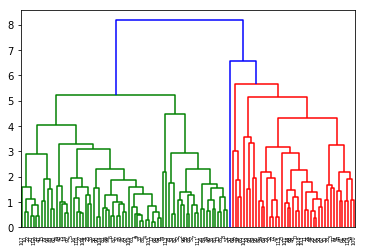

In [110]:
# complete linkage
mergings = linkage(pcanewdf.iloc[:,:-1], method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [111]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels
# assign cluster labels
could_be_funded['cluster_labels'] = cluster_labels
could_be_funded.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,cluster_labels,cluster_id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,1,4,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,2,2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,0,0,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,1,4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [112]:
@interact
def boxplots(x="cluster_labels", y=vars):
    return sns.boxplot(x=x, y=y, data=could_be_funded)

interactive(children=(Text(value='cluster_labels', description='x'), Dropdown(description='y', options=('child…

In [117]:
@interact
def scplot(x=vars,y=vars):
    return sns.lmplot( x=x, y=y, data=could_be_funded, fit_reg=False, hue="cluster_labels", legend=True)

interactive(children=(Dropdown(description='x', options=('child_mort', 'exports', 'health', 'imports', 'income…

In [114]:
@interact
def segiddf(id=[0,1,2,3,4]):
    print(could_be_funded[could_be_funded["cluster_labels"]==id].country.values)

interactive(children=(Dropdown(description='id', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_classes=('…

In [115]:
@interact
def boxplots(y=vars):
    return sns.boxplot(x="cluster_labels", y=y, data=could_be_funded)

interactive(children=(Dropdown(description='y', options=('child_mort', 'exports', 'health', 'imports', 'income…

In [116]:
@interact
def countryplot(Country=could_be_funded["country"]):
    return print("Cluster_label - ",could_be_funded[could_be_funded["country"]==Country]["cluster_labels"].values), could_be_funded.iloc[:,3:][could_be_funded["country"]==Country].plot(kind="bar", legend="best", figsize=[7,5])

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …